In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

import numpy as np
import scipy as sp

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mpl_toolkits as mplot3d
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

from wordcloud import WordCloud, STOPWORDS
from tqdm import tqdm
tqdm.pandas()

# EURO DATASET

In [2]:
euro = pd.read_spss("Risikoatlas_EuropeanSurvey_translated_allcountries.sav")

In [3]:
euro

,responseid,status,country,q0,s1,s2_1,age_rec,s5uk,s4de,s5de,s4it,s5it,s4es,s5es,s5fr,s5pl,s5se,isced,leg,s7,s8,English_occupation,q1_1,English_risk1,q1_2,English_risk2,q1_3,English_risk3,q4_1,q4_2,q4_3,q4_4,q4_5,q4_6,q4_7,q4_8,q4_9,q4_10,q4_11,q4_12,q4_13,q4_14,q4_15,q4_16,q5_1,q5_2,q5_3,q5_4,q5_5,q5_6,q5_7,q5_8,q5_9,q6,q7_1,q7_2,q7_3,q8_2_1,q8_2_2,q8_2_3,q8_2_4,q8_2_5,q8_3,q8_4,q8_5berlin_1,q8_5london_1,q8_5paris_1,q8_6,q8_7,q9_1_1,q9_2_1,q9_3,q10_1_1,q10_2_1,q10_3_1,q10_4,q11_1,q12,q13_1,q13_2,q13_3,q13_4,q13_5,q13_4_other,English_otherinsur,q14_1,q14_na,q15_1,q16,q17,qxa1a_1_1,qxa1b_1_1,qxa1a_1_2,qxa1b_1_2,qxa1a_1_3,qxa1b_1_3,qxa1a_1_4,qxa1b_1_4,qxa1a_1_5,qxa1b_1_5,qxa1a_1_6,qxa1b_1_6,qxa1a_1_7,qxa1b_1_7,qxa1a_1_8,qxa1b_1_8,qxa1a_1_9,qxa1b_1_9,qxa1a_1_10,qxa1b_1_10,qxa1a_1_11,qxa1b_1_11,qxa1a_1_12,qxa1b_1_12,qxa1a_1_13,qxa1b_1_13,qxa1a_1_14,qxa1b_1_14,qxa1a_1_15,qxa1b_1_15,qxa1a_1_16,qxa1b_1_16,qxb1a_1_1,qxb1b_1_1,qxb1a_1_2,qxb1b_1_2,qxb1a_1_3,qxb1b_1_3,qxb1a_1_4,qxb1b_1_4,qxb1a_1_5,qxb1b_1_5,qxb1a_1_6,qxb1b_1_6,qxb1a_1_7,qxb1b_1_7,qxb1a_1_8,qxb1b_1_8,qxb1a_1_9,qxb1b_1_9,qxb1a_1_10,qxb1b_1_10,qxb1a_1_11,qxb1b_1_11,qxb1a_1_12,qxb1b_1_12,qxb1a_1_13,qxb1b_1_13,qxb1a_1_14,qxb1b_1_14,qxb1a_1_15,qxb1b_1_15,qxb1a_1_16,qxb1b_1_16,qxc1a_1_1,qxc1b_1_1,qxc1a_1_2,qxc1b_1_2,qxc1a_1_3,qxc1b_1_3,qxc1a_1_4,qxc1b_1_4,qxc1a_1_5,qxc1b_1_5,qxc1a_1_6,qxc1b_1_6,qxc1a_1_7,qxc1b_1_7,qxc1a_1_8,qxc1b_1_8,qxc1a_1_9,qxc1b_1_9,qxc1a_1_10,qxc1b_1_10,qxc1a_1_11,qxc1b_1_11,qxc1a_1_12,qxc1b_1_12,qxc1a_1_13,qxc1b_1_13,qxc1a_1_14,qxc1b_1_14,qxc1a_1_15,qxc1b_1_15,qxc1a_1_16,qxc1b_1_16,weight
0,2593.0,complete,Germany,Yes,Male,75.0,60 – 75 years,NaN,Fachhochschul- oder Hochschulreife,Abgeschlossene Lehre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,medium,L2,Neunkirchen-Seelscheid,Rentner,,Tick,quirk,Trick,trick,Track,track,3,3,No fear1,No fear1,No fear1,No fear1,3,Extreme fear5,No fear1,No fear1,3,No fear1,No fear1,No fear1,No fear1,No fear1,2,Moderately3,Not at all1,2,Not at all1,Not at all1,Completely5,4,Moderately3,I consider it as an opportunity and as a threat,No,Yes,No,Yes,Yes,Yes,No,No,"Irrespective of the quality of the study, futu...",the real growth rate is not predictable with c...,"Lottery B:1 out of 1,000",Lottery B:0.099%,"Lottery B:6 out of 10,000",The medication increases recovery by 2%,the intervention increases employment from 80 ...,25.0,20.0,Can’t say,500.0,10.0,0.500,59 out of 100,3.0,"35,000 – 44,999 GBP",Health insurance (Which of the following insur...,Third-party insurance (a personal insurance ag...,Household insurance (Which of the following in...,"Others, please specify: (Which of the followin...",0.0,leider keine Verrsicherung gegen saudumme Umfr...,,NaN,I prefer not to answer,0.0,"all or more than the household income, even th...","write down budget and spending, but have no em...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,0.0,0.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.970773
1,1605.0,complete,Germany,Yes,Female,18.0,18 – 35 years,NaN,Noch in schulischer Ausbildung,Keine abgeschlossene Berufsausbildung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low,L2,Sachsen,Schüler,,Armut,poverty,Überfall,attack,Krieg,war,4,4,3,4,2,2,2,Extreme fear5,No fear1,No fear1,No fear1,4,No fear1,3,3,2,Moderately3,Not at all1,2,2,Not at all1,4,Completely5,Not at all1,2,I consider it mostly as a threat,No,Yes,No,No,Yes,Yes,No,No,"Irrespective of the quality of the study, futu...",the real growth rate is likely overestimated,"Lottery B:1 out of 1,000",Lottery A:0.7 %,"Lottery B:6 out of 10,000",The medication increases recovery by 50%,the intervent

## EURO DATASET WORD CLOUD

In [4]:
dfWC = euro.loc[ :, ["English_risk1", "English_risk2", "English_risk3"]].copy()
dfWC

,English_risk1,English_risk2,English_risk3
0,quirk,trick,track
1,poverty,attack,war
2,illness,poverty,not enough time
3,the children's future,terrorism,illnesses
4,heart attack,stroke,liver damage
...,...,...,...
3901,health,terror attack,environmental pollution
3902,threat,lies,theft
3903,knee injury,care,economy
3904,crime,humiliation because I'm Swedish,poverty


In [5]:
wordList1 = [ x for list in dfWC["English_risk1"] for x in list.split() ]
wordList2 = [ x for list in dfWC["English_risk2"] for x in list.split() ]
wordList3 = [ x for list in dfWC["English_risk3"] for x in list.split() ]

wordList = wordList1 + wordList2 + wordList3

In [6]:
df1 = pd.DataFrame()
df1["wordList"] = wordList
df1["wordList"].value_counts()

wordList
health           1127
accident          747
of                731
illness           665
money             426
                 ... 
weight/health       1
giving              1
part                1
starting            1
racists             1
Name: count, Length: 2414, dtype: int64

In [7]:
stopwords = STOPWORDS
stopwords.add('lack')
stopwords.add('ill')
stopwords.add('nothing')

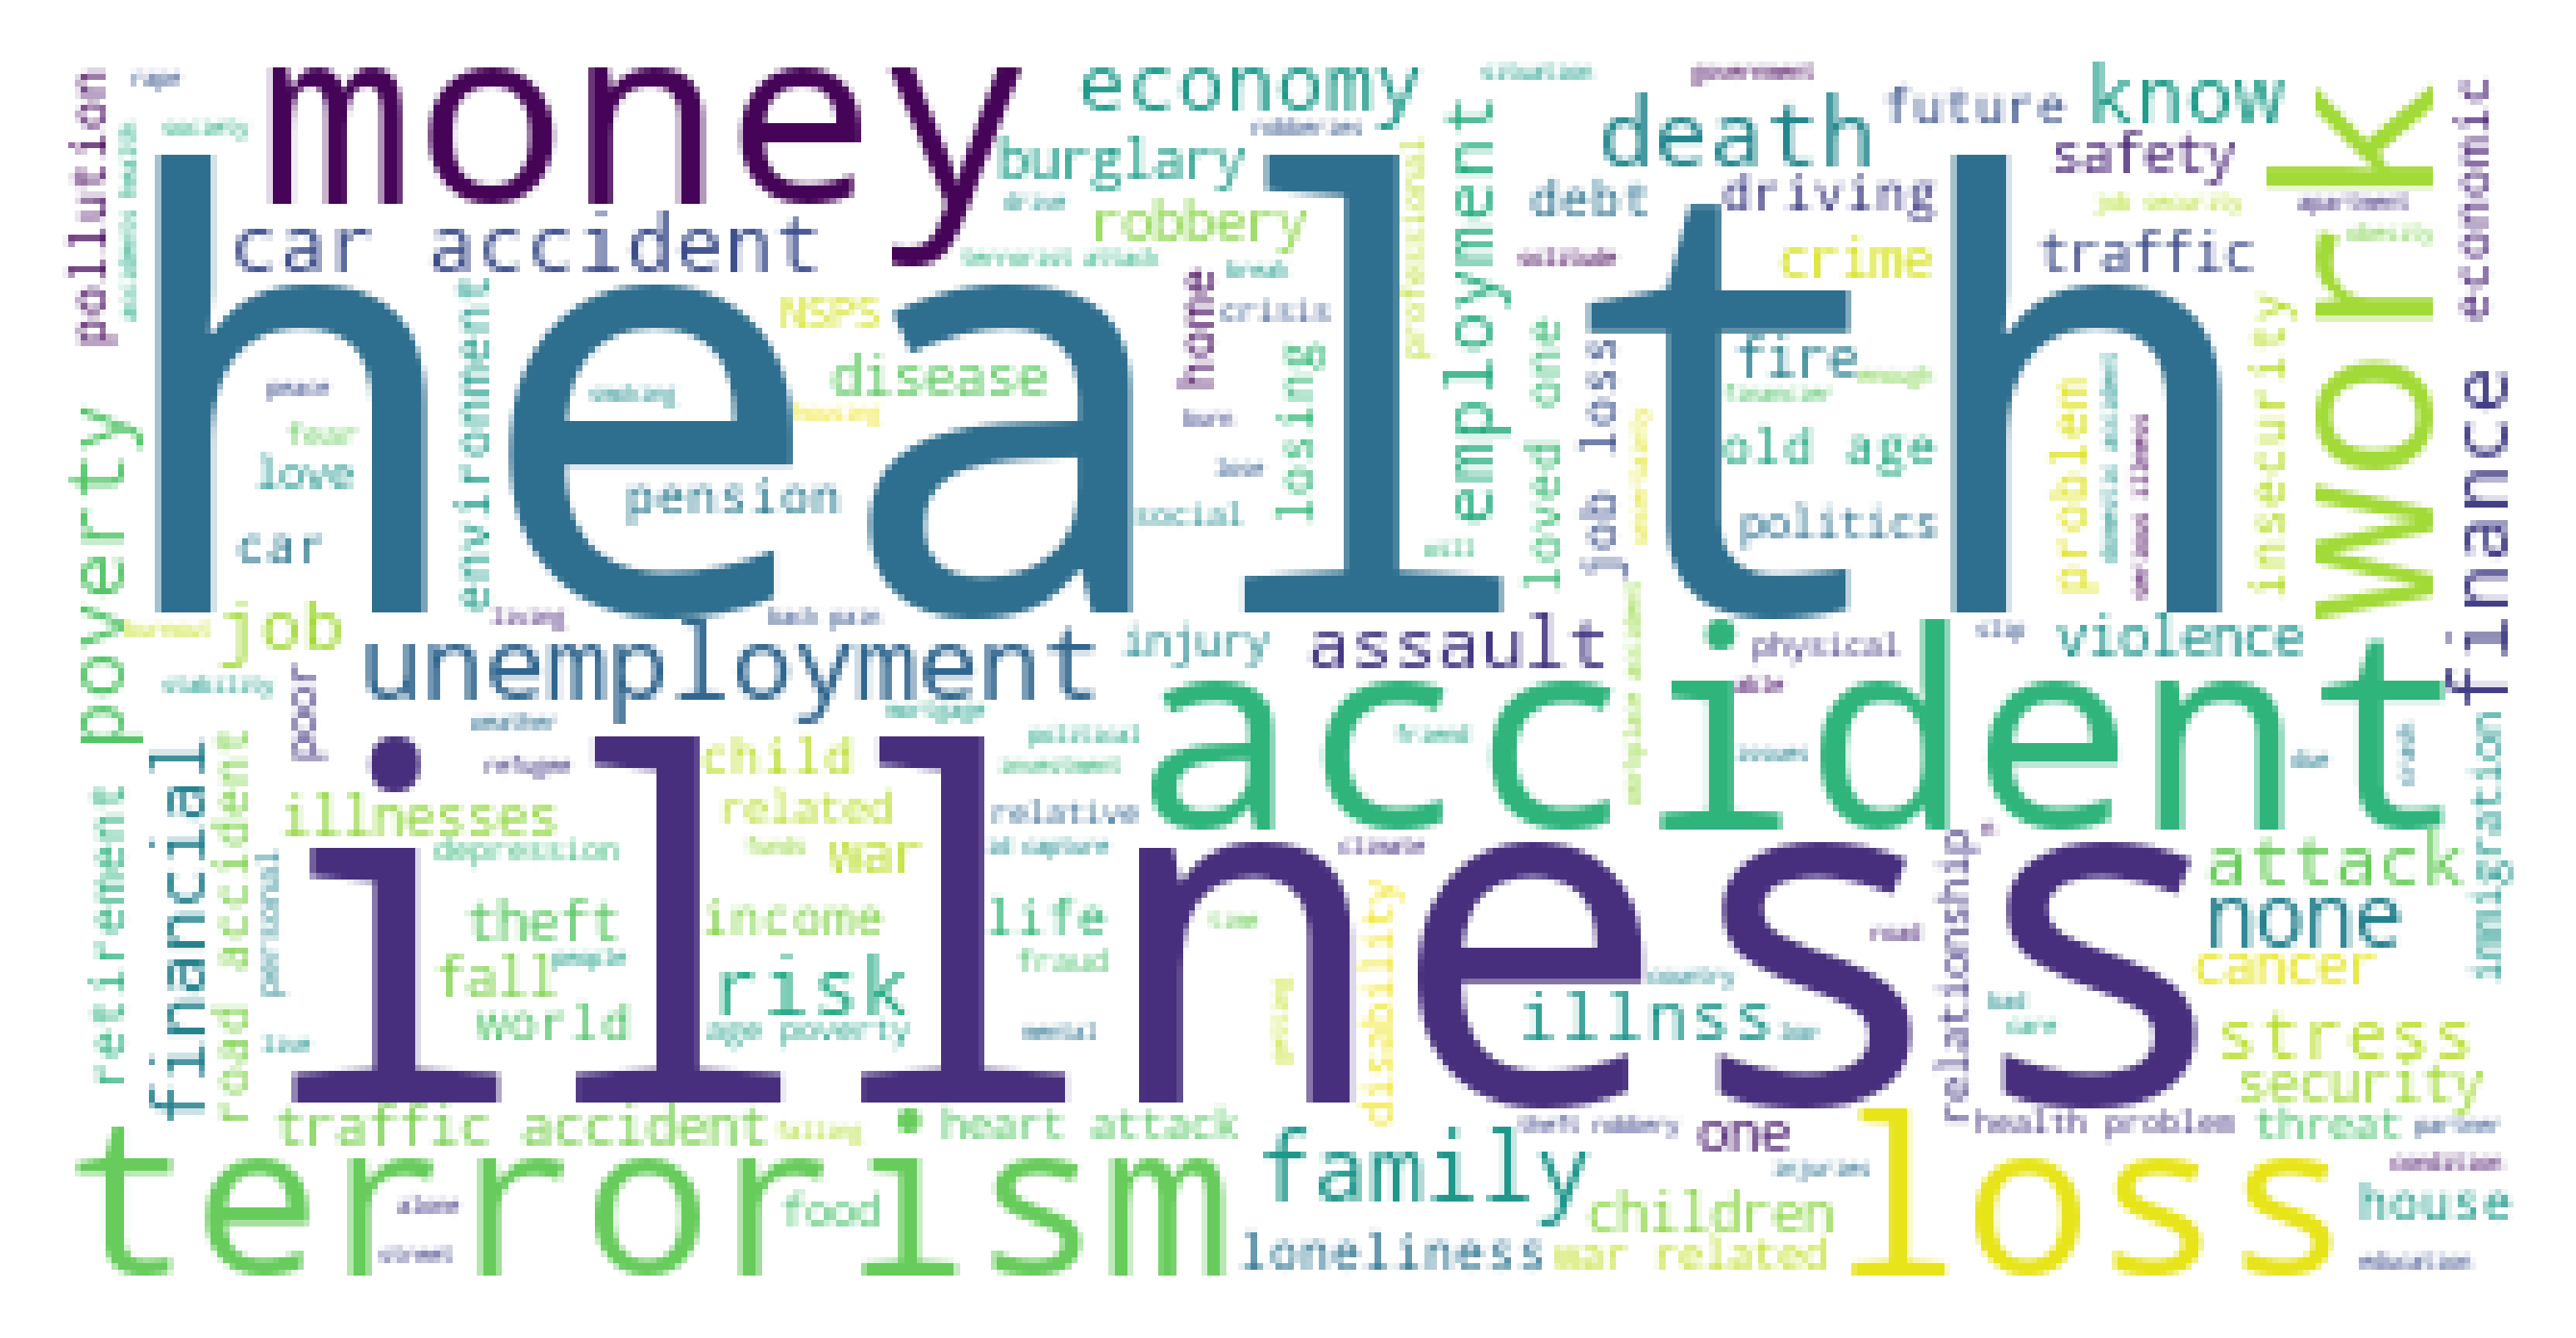

In [8]:
wc = WordCloud( background_color = "white", stopwords = stopwords).generate(' '.join(df1["wordList"]))

plt.imshow(wc)
plt.axis("off")
plt.savefig("EuroRisks_wordCloud.png")
plt.show()

## Scoring

In [9]:
euro.head( n = 1)

,responseid,status,country,q0,s1,s2_1,age_rec,s5uk,s4de,s5de,s4it,s5it,s4es,s5es,s5fr,s5pl,s5se,isced,leg,s7,s8,English_occupation,q1_1,English_risk1,q1_2,English_risk2,q1_3,English_risk3,q4_1,q4_2,q4_3,q4_4,q4_5,q4_6,q4_7,q4_8,q4_9,q4_10,q4_11,q4_12,q4_13,q4_14,q4_15,q4_16,q5_1,q5_2,q5_3,q5_4,q5_5,q5_6,q5_7,q5_8,q5_9,q6,q7_1,q7_2,q7_3,q8_2_1,q8_2_2,q8_2_3,q8_2_4,q8_2_5,q8_3,q8_4,q8_5berlin_1,q8_5london_1,q8_5paris_1,q8_6,q8_7,q9_1_1,q9_2_1,q9_3,q10_1_1,q10_2_1,q10_3_1,q10_4,q11_1,q12,q13_1,q13_2,q13_3,q13_4,q13_5,q13_4_other,English_otherinsur,q14_1,q14_na,q15_1,q16,q17,qxa1a_1_1,qxa1b_1_1,qxa1a_1_2,qxa1b_1_2,qxa1a_1_3,qxa1b_1_3,qxa1a_1_4,qxa1b_1_4,qxa1a_1_5,qxa1b_1_5,qxa1a_1_6,qxa1b_1_6,qxa1a_1_7,qxa1b_1_7,qxa1a_1_8,qxa1b_1_8,qxa1a_1_9,qxa1b_1_9,qxa1a_1_10,qxa1b_1_10,qxa1a_1_11,qxa1b_1_11,qxa1a_1_12,qxa1b_1_12,qxa1a_1_13,qxa1b_1_13,qxa1a_1_14,qxa1b_1_14,qxa1a_1_15,qxa1b_1_15,qxa1a_1_16,qxa1b_1_16,qxb1a_1_1,qxb1b_1_1,qxb1a_1_2,qxb1b_1_2,qxb1a_1_3,qxb1b_1_3,qxb1a_1_4,qxb1b_1_4,qxb1a_1_5,qxb1b_1_5,qxb1a_1_6,qxb1b_1_6,qxb1a_1_7,qxb1b_1_7,qxb1a_1_8,qxb1b_1_8,qxb1a_1_9,qxb1b_1_9,qxb1a_1_10,qxb1b_1_10,qxb1a_1_11,qxb1b_1_11,qxb1a_1_12,qxb1b_1_12,qxb1a_1_13,qxb1b_1_13,qxb1a_1_14,qxb1b_1_14,qxb1a_1_15,qxb1b_1_15,qxb1a_1_16,qxb1b_1_16,qxc1a_1_1,qxc1b_1_1,qxc1a_1_2,qxc1b_1_2,qxc1a_1_3,qxc1b_1_3,qxc1a_1_4,qxc1b_1_4,qxc1a_1_5,qxc1b_1_5,qxc1a_1_6,qxc1b_1_6,qxc1a_1_7,qxc1b_1_7,qxc1a_1_8,qxc1b_1_8,qxc1a_1_9,qxc1b_1_9,qxc1a_1_10,qxc1b_1_10,qxc1a_1_11,qxc1b_1_11,qxc1a_1_12,qxc1b_1_12,qxc1a_1_13,qxc1b_1_13,qxc1a_1_14,qxc1b_1_14,qxc1a_1_15,qxc1b_1_15,qxc1a_1_16,qxc1b_1_16,weight
0,2593.0,complete,Germany,Yes,Male,75.0,60 – 75 years,NaN,Fachhochschul- oder Hochschulreife,Abgeschlossene Lehre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,medium,L2,Neunkirchen-Seelscheid,Rentner,,Tick,quirk,Trick,trick,Track,track,3,3,No fear1,No fear1,No fear1,No fear1,3,Extreme fear5,No fear1,No fear1,3,No fear1,No fear1,No fear1,No fear1,No fear1,2,Moderately3,Not at all1,2,Not at all1,Not at all1,Completely5,4,Moderately3,I consider it as an opportunity and as a threat,No,Yes,No,Yes,Yes,Yes,No,No,"Irrespective of the quality of the study, futu...",the real growth rate is not predictable with c...,"Lottery B:1 out of 1,000",Lottery B:0.099%,"Lottery B:6 out of 10,000",The medication increases recovery by 2%,the intervention increases employment from 80 ...,25.0,20.0,Can’t say,500.0,10.0,0.5,59 out of 100,3.0,"35,000 – 44,999 GBP",Health insurance (Which of the following insur...,Third-party insurance (a personal insurance ag...,Household insurance (Which of the following in...,"Others, please specify: (Which of the followin...",0.0,leider keine Verrsicherung gegen saudumme Umfr...,,NaN,I prefer not to answer,0.0,"all or more than the household income, even th...","write down budget and spending, but have no em...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,0.0,0.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,999999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.970773


### Certainty Facet

In [10]:
euro["certainty1"] = np.where( euro["q8_2_1"] == "No", 1, 0)
euro["certainty2"] = np.where( euro["q8_2_2"] == "No", 1, 0)
euro["certainty3"] = np.where( euro["q8_2_3"] == "No", 1, 0)
euro["certainty4"] = np.where( euro["q8_2_4"] == "No", 1, 0)
euro["certainty5"] = np.where( euro["q8_2_5"] == "No", 1, 0)

### Uncertainty Facet

In [11]:
euro["uncertainty1"] = np.where( euro["q8_3"] == "The lower the quality of the study, the more likely that future studies will change the risk estimate.", 1, 0)

euro["uncertainty2"] = np.where( euro["q8_4"] == "the real growth rate is not predictable with certainty", 1, 0)

### Risk Comprehension Facet

In [12]:
euro["riskcomprehension1"] = np.where( euro["q8_5berlin_1"] == "Lottery B:1 out of 1,000", 1, 0 )
euro["riskcomprehension2"] = np.where( euro["q8_5london_1"] == "Lottery A:0.7 %", 1, 0 )
euro["riskcomprehension3"] = np.where( euro["q8_5paris_1"] == "Lottery A:0.61%", 1, 0 )

euro["riskcomprehension4"] = np.where( euro["q8_6"] == "The medication increases recovery by 100%", 1, 0 )

euro["riskcomprehension5"] = np.where( euro["q8_7"] == "None of the above is implied.", 1, 0 )

### Numeracy Facet

In [13]:
euro["numeracy1"] = np.where( euro["q10_1_1"] == 500, 1, 0 )

euro["numeracy2"] = np.where( euro["q10_2_1"] == 10, 1, 0 )

euro["numeracy3"] = np.where( euro["q10_3_1"] == 0.1, 1, 0 )

### Bayesian Reasoning Facet

In [14]:
euro["bayesian1"] = np.where( euro["q10_4"] == "9 out of 59", 1, 0 )

### Graph Literacy Facet

In [15]:
euro["graph1"] = np.where( euro["q9_1_1"] == 25, 1, 0 )

euro["graph2"] = np.where( euro["q9_2_1"] == 20, 1, 0 )

euro["graph3"] = np.where( euro["q9_3"] == "They are equal", 1, 0 )

## Demographics

In [16]:
euro["gender"] = euro["s1"]
euro["age"] = euro["s2_1"]
euro["wealth"] = euro["q14_1"]

euro["iscedText"] = euro["isced"].copy()
euro["isced"] = np.where( euro["iscedText"] == "low", 3,
                         np.where( euro["iscedText"] == "medium", 2,
                                  np.where( euro["iscedText"] == "high", 1, 0
                                          )
                                 )
                        )

euro["occupation"] = euro["s8"]

euro["income"] = np.where( euro["q12"] == "Below 15,000 GPB", 1,
                          np.where( euro["q12"] == "15,000 - 24,999 GBP", 2,
                                   np.where( euro["q12"] == "25,000 – 34,999 GBP", 3,
                                            np.where( euro["q12"] == "35,000 – 44,999 GBP", 4,
                                                     np.where( euro["q12"] == "45,000 – 60,000 GBP", 5,
                                                              np.where( euro["q12"] == "More than 60,000 GBP", 6,
                                                                       np.where( euro["q12"] == "I prefer not to answer", 0, 0
                                                                               )
                                                                      )
                                                             )
                                                    )
                                           )
                                  )
                         )

euro["dataSource"] = "EuroFelix"

## Final Scoring

In [17]:
def finalScoring(frame):
    frame["Certainty_5"] = frame["certainty1"] + frame["certainty2"] + frame["certainty3"] + frame["certainty4"] + frame["certainty5"]

    frame["Uncertainty_2"] = frame["uncertainty1"] + frame["uncertainty2"]

    frame["Risk Comprehension_5"] = frame["riskcomprehension1"] + frame["riskcomprehension2"] + frame["riskcomprehension3"] + frame["riskcomprehension4"] + frame["riskcomprehension5"]
    
    frame["Graph Literacy_3"] = frame["graph1"] + frame["graph2"] + frame["graph3"]

    frame["Numeracy_3"] = frame["numeracy1"] + frame["numeracy2"] + frame["numeracy3"]

    frame["Bayesian Reasoning_1"] = frame["bayesian1"]

    frame["Total Score_19"] = frame["Certainty_5"] + frame["Uncertainty_2"] + frame["Risk Comprehension_5"] + frame["Graph Literacy_3"] + frame["Numeracy_3"] + frame["Bayesian Reasoning_1"]

    
    frame["Certainty_%"] = frame["Certainty_5"] / 5 * 100
    frame["Uncertainty_%"] = frame["Uncertainty_2"] / 2 * 100
    frame["Risk Comprehension_%"] = frame["Risk Comprehension_5"] / 5 * 100
    frame["Graph Literacy_%"] = frame["Graph Literacy_3"] / 3 * 100
    frame["Numeracy_%"] = frame["Numeracy_3"] / 3 * 100
    frame["Bayesian Reasoning_%"] = frame["Bayesian Reasoning_1"] / 1 * 100
    frame["Total Score_%"] = frame["Total Score_19"] / 19 * 100

    columnsReq = ["dataSource", "country", "gender", "age", "age_rec", "isced", "occupation", "income", "wealth",
                  "certainty1", "certainty2", "certainty3", "certainty4", "certainty5",
                  "uncertainty1", "uncertainty2",
                  "riskcomprehension1", "riskcomprehension2", "riskcomprehension3", "riskcomprehension4", "riskcomprehension5",
                  "graph1", "graph2", "graph3",
                  "numeracy1", "numeracy2", "numeracy3",
                  "bayesian1",
                  "Certainty_5", "Uncertainty_2", "Risk Comprehension_5", "Graph Literacy_3", "Numeracy_3", "Bayesian Reasoning_1", "Total Score_19",
                  "Certainty_%", "Uncertainty_%", "Risk Comprehension_%", "Graph Literacy_%", "Numeracy_%", "Bayesian Reasoning_%", "Total Score_%"
                 ]

    return frame[columnsReq]
                  
                    

In [18]:
euroScored = finalScoring(euro)
euroScored

,dataSource,country,gender,age,age_rec,isced,occupation,income,wealth,certainty1,certainty2,certainty3,certainty4,certainty5,uncertainty1,uncertainty2,riskcomprehension1,riskcomprehension2,riskcomprehension3,riskcomprehension4,riskcomprehension5,graph1,graph2,graph3,numeracy1,numeracy2,numeracy3,bayesian1,Certainty_5,Uncertainty_2,Risk Comprehension_5,Graph Literacy_3,Numeracy_3,Bayesian Reasoning_1,Total Score_19,Certainty_%,Uncertainty_%,Risk Comprehension_%,Graph Literacy_%,Numeracy_%,Bayesian Reasoning_%,Total Score_%
0,EuroFelix,Germany,Male,75.0,60 – 75 years,2,Rentner,4,NaN,0,0,0,1,1,0,1,1,0,0,0,0,1,1,0,1,1,0,0,2,1,1,2,2,0,8,40.0,50.0,20.0,66.666667,66.666667,0.0,42.105263
1,EuroFelix,Germany,Female,18.0,18 – 35 years,3,Schüler,4,NaN,1,0,0,1,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,3,0,2,1,1,0,7,60.0,0.0,40.0,33.333333,33.333333,0.0,36.842105
2,EuroFelix,Germany,Male,26.0,18 – 35 years,2,Mediengestalter,1,NaN,0,0,0,1,1,0,1,1,1,1,1,0,1,0,1,1,1,1,0,2,1,4,2,3,0,12,40.0,50.0,80.0,66.666667,100.000000,0.0,63.157895
3,EuroFelix,Germany,Female,45.0,36 – 59 years,2,MTA,4,NaN,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,1,1,2,0,6,20.0,50.0,20.0,33.333333,66.666667,0.0,31.578947
4,EuroFelix,Germany,Male,58.0,36 – 59 years,2,Haustechniker,1,0.0,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,1,1,3,1,0,0,6,20.0,50.0,60.0,33.333333,0.000000,0.0,31.578947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3901,EuroFelix,Sweden,Male,46.0,36 – 59 years,2,Dispatcher/Coordinator,5,2000000.0,1,1,0,1,1,0,1,1,1,0,1,0,1,0,1,1,1,1,0,4,1,3,2,3,0,13,80.0,50.0,60.0,66.666667,100.000000,0.0,68.421053
3902,EuroFelix,Sweden,Male,37.0,36 – 59 years,2,egen företagare,1,200000.0,1,1,1,1,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0,5,1,3,0,1,0,10,100.0,50.0,60.0,0.000000,33.333333,0.0,52.631579
3903,EuroFelix,Sweden,Male,53.0,36 – 59 years,2,Allt i allo,2,60000.0,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,5,0,2,0,1,0,8,100.0,0.0,40.0,0.000000,33.333333,0.0,42.105263
3904,EuroFelix,Sweden,Male,58.0,36 – 59 years,2,sjukskriven,3,0.0,0,0,0,0,1,0,1,1,1,1,0,1,0,1,0,1,1,0,0,1,1,4,1,2,0,9,20.0,50.0,80.0,33.333333,66.666667,0.0,47.368421


# Indian BeSample Dataset

In [19]:
indBesample = pd.read_csv("Indian Risk Survey_Besample_Filtered_12_2024.csv").drop( ["Unnamed: 0"], axis = 1).iloc[:, 19:62].rename({"response_id":"responseid"}, axis = 1).copy()
indBesample["country"] = "India"
indBesample

,Q1,Q2,Q3,Q4,Q5_1,Q6_1,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q9b_1,Q9b_4,Q9b_5,Q9b_6,Q9b_7,Q9b_8,Q9b_9,Q11a_1,Q11a_2,Q11a_3,Q11b,Q11c,Q11d,Q11h,Attention Check,Q11i,Q12a,Q12b,Q12c,Q13a,Q13b,Q13c,Q13d,Q14a,Q14b,Q14c,Q15a,Q14b.1,responseid,country
0,Male,18,Secondary School (11th to 12th Std.),Student,4,7,3,3,3,4,5,4,3,4,25.0,15.0,10,10,10.0,10,20.0,2,2,2,"HIV test,Professional horoscope","Irrespective of the quality of the study, futu...",The growth rate over five years will be betwee...,5 in 100 people prior to the intervention to 6...,Vase,The medication increases recovery by 100%,More than $102,Less than today with the money in this account,False,500,10,0.10,9 out of 10,25.0,20,They are equal,"INR 1500,001 – INR 30,00,000",10000000.0,81553,India
1,Male,41,Undergraduate Program,Salaried/Employee/Consultant in a sector other...,6,9,4,4,4,4,4,5,4,5,10.0,30.0,0,0,20.0,40,0.0,2,1,1,"HIV test,Fingerprint,DNA test","Irrespective of the quality of the study, futu...",It is not possible to predict the growth rate ...,"100 in 10,000 people prior to the intervention...",Vase,The medication increases recovery by 100%,More than $102,Less than today with the money in this account,False,500,10,0.10,59 out of 1000,25.0,20,Can’t say,"INR 500,001 – INR 15,00,000",5000000.0,41152,India
2,Male,20,Undergraduate Program,Student,3,0 (no investment experience),6 (strongly agree),6 (strongly agree),4,1 (strongly disagree),1 (strongly disagree),2,1 (strongly disagree),6 (strongly agree),30.0,40.0,10,10,0.0,5,5.0,1,1,1,Fingerprint,"The higher the quality of the study, the more ...",It is not possible to predict the growth rate ...,70 in 100 people prior to the intervention to ...,Vase,The medication increases recovery by 50%,More than $102,More than today with the money in this account,Do not know,1000,10,50.00,9 out of 59,50.0,20,They are equal,"< INR 500,000",10000.0,38249,India
3,Male,18,Secondary School (11th to 12th Std.),Student,5,0 (no investment experience),6 (strongly agree),6 (strongly agree),4,4,1 (strongly disagree),6 (strongly agree),4,6 (strongly agree),0.0,0.0,0,20,40.0,40,0.0,1,1,2,"Fingerprint,DNA test","The higher the quality of the study, the more ...",The growth rate over five years will be exactl...,"100 in 10,000 people prior to the intervention...",Vase,The medication increases recovery by 50%,More than $102,Less than today with the money in this account,False,500,10,0.10,59 out of 1000,25.0,20,They are equal,"< INR 500,000",1000000.0,24242,India
4,Male,37,Undergraduate Program,Salaried/Employee/Consultant in a sector other...,3,1,4,5,5,6 (strongly agree),6 (strongly agree),6 (strongly agree),6 (strongly agree),2,70.0,10.0,0,0,0.0,10,10.0,2,1,1,"HIV test,Fingerprint,DNA test,Cancer screening...","The higher the quality of the study, the more ...",The growth rate over five years will be exactl...,"100 in 10,000 people prior to the intervention...",Vase,The medication increases recovery by 100%,More than $102,Less than today with the money in this account,False,500,10,0.10,59 out of 1000,25.0,20,They are equal,"< INR 500,000",1000000.0,38412,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,Male,48,Post-Graduate Program,Salaried/Employee/Consultant in a sector other...,0 (unwilling to take risk),1,4,5,4,5,5,2,3,6 (strongly agree),50.0,10.0,10,20,2.0,5,3.0,1,1,1,Professional horoscope,"Irrespective of the quality of the study, futu...",The growth rate over five years will be exactl...,70 in 100 people prior to the intervention to ...,Vase,The medication increases recovery by 2%,Refuse to answer,Exactly the same as today with the money in th...,False,500,68,0.01,59 out of 100,50.0,40,They are equal,"< INR 500,000",50000.0,10717,India
366,Male,22,Undergraduate Program,Salaried/Employee/Consultant in a sector other...,5,6,5,5,4,5,5,6 (strongly agree),5,4,70.0,15.0,0,0,15.0,0,0.0,2,1,2,Cancer scr

## Scoring

In [20]:
indBesample.head( n = 1)

,Q1,Q2,Q3,Q4,Q5_1,Q6_1,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5,Q8_6,Q8_7,Q8_8,Q9b_1,Q9b_4,Q9b_5,Q9b_6,Q9b_7,Q9b_8,Q9b_9,Q11a_1,Q11a_2,Q11a_3,Q11b,Q11c,Q11d,Q11h,Attention Check,Q11i,Q12a,Q12b,Q12c,Q13a,Q13b,Q13c,Q13d,Q14a,Q14b,Q14c,Q15a,Q14b.1,responseid,country
0,Male,18,Secondary School (11th to 12th Std.),Student,4,7,3,3,3,4,5,4,3,4,25.0,15.0,10,10,10.0,10,20.0,2,2,2,"HIV test,Professional horoscope","Irrespective of the quality of the study, futu...",The growth rate over five years will be betwee...,5 in 100 people prior to the intervention to 6...,Vase,The medication increases recovery by 100%,More than $102,Less than today with the money in this account,False,500,10,0.1,9 out of 10,25.0,20,They are equal,"INR 1500,001 – INR 30,00,000",10000000.0,81553,India


### Certainty Facet

In [21]:
indBesample["certainty1"] = np.where( ~indBesample["Q11b"].str.contains("HIV test"), 1, 0)
indBesample["certainty2"] = np.where( ~indBesample["Q11b"].str.contains("Fingerprint"), 1, 0)
indBesample["certainty3"] = np.where( ~indBesample["Q11b"].str.contains("DNA test"), 1, 0)
indBesample["certainty4"] = np.where( ~indBesample["Q11b"].str.contains("Cancer screening test"), 1, 0)
indBesample["certainty5"] = np.where( ~indBesample["Q11b"].str.contains("Professional horoscope"), 1, 0)

indBesample["certainty1"] = np.where( indBesample["certainty1"] + indBesample["certainty2"] + indBesample["certainty3"] + indBesample["certainty4"] + indBesample["certainty5"] == 4, 1, indBesample["certainty1"] )
indBesample["certainty2"] = np.where( indBesample["certainty1"] + indBesample["certainty2"] + indBesample["certainty3"] + indBesample["certainty4"] + indBesample["certainty5"] == 4, 1, indBesample["certainty2"] )
indBesample["certainty3"] = np.where( indBesample["certainty1"] + indBesample["certainty2"] + indBesample["certainty3"] + indBesample["certainty4"] + indBesample["certainty5"] == 4, 1, indBesample["certainty3"] )
indBesample["certainty4"] = np.where( indBesample["certainty1"] + indBesample["certainty2"] + indBesample["certainty3"] + indBesample["certainty4"] + indBesample["certainty5"] == 4, 1, indBesample["certainty4"] )
indBesample["certainty5"] = np.where( indBesample["certainty1"] + indBesample["certainty2"] + indBesample["certainty3"] + indBesample["certainty4"] + indBesample["certainty5"] == 4, 1, indBesample["certainty5"] )

### Uncertainty Facet

In [22]:
indBesample["uncertainty1"] = np.where( indBesample["Q11c"] == "The lower the quality of the study, the more likely that future studies will change the risk estimate.", 1, 0)

indBesample["uncertainty2"] = np.where( indBesample["Q11d"] == "It is not possible to predict the growth rate with certainty", 1, 0)

### Risk Comprehension Facet

In [23]:
indBesample["riskcomprehension1"] = np.where( indBesample["Q11a_1"] == 2, 1, 0 )
indBesample["riskcomprehension2"] = np.where( indBesample["Q11a_2"] == 1, 1, 0 )
indBesample["riskcomprehension3"] = np.where( indBesample["Q11a_3"] == 1, 1, 0 )

indBesample["riskcomprehension4"] = np.where( indBesample["Q11i"] == "The medication increases recovery by 100%", 1, 0 )

indBesample["riskcomprehension5"] = np.where( indBesample["Q11h"] == "It is not possible to determine which of the answers is correct given the information provided", 1, 0 )

### Numeracy Facet

In [24]:
indBesample["numeracy1"] = np.where( indBesample["Q13a"] == 500, 1, 0 )

indBesample["numeracy2"] = np.where( indBesample["Q13b"] == 10, 1, 0 )

indBesample["numeracy3"] = np.where( indBesample["Q13c"] == 0.1, 1, 0 )

### Bayesian Reasoning Facet

In [25]:
indBesample["bayesian1"] = np.where( indBesample["Q13d"] == "9 out of 59", 1, 0 )

### Graph Literacy Facet

In [26]:
indBesample["graph1"] = np.where( indBesample["Q14a"] == 25, 1, 0 )

indBesample["graph2"] = np.where( indBesample["Q14b"] == 20, 1, 0 )

indBesample["graph3"] = np.where( indBesample["Q14c"] == "They are equal", 1, 0 )

## Demographics

In [27]:
indBesample["gender"] = indBesample["Q1"]

indBesample["age"] = indBesample["Q2"]
indBesample["age_rec"] = np.where( (indBesample["age"] >= 16) & (indBesample["age"] <= 35), "18 – 35 years",
                          np.where( (indBesample["age"] >= 36) & (indBesample["age"] <= 59), "36 – 59 years",
                                   np.where( (indBesample["age"] >= 60) & (indBesample["age"] <= 75), "60 – 75 years", 0
                                           )
                                  )
                         )



indBesample["isced"] = np.where( (indBesample["Q3"] == "Primary School (up to 10th Std.)") | (indBesample["Q3"] == "Secondary School (11th to 12th Std.)"), 3,
                         np.where( (indBesample["Q3"] == "Undergraduate Program") | (indBesample["Q3"] == "Diploma and Vocational Training") , 2,
                                  np.where( (indBesample["Q3"] == "Post-Graduate Program") | (indBesample["Q3"] == "M.Phil.") | (indBesample["Q3"] == "Ph.D. and higher"), 1, 0
                                          )
                                 )
                        )

indBesample["occupation"] = indBesample["Q4"]

indBesample["wealth"] = indBesample["Q14b.1"]
indBesample["income"] = np.where( indBesample["Q15a"] == "< INR 500,000", 1,
                          np.where( indBesample["Q15a"] == "INR 500,001 – INR 15,00,000", 2,
                                   np.where( indBesample["Q15a"] == "INR 1500,001 – INR 30,00,000", 3,
                                            np.where( indBesample["Q15a"] == "INR 30,00,001 – INR 50,00,000", 4,
                                                     np.where( indBesample["Q15a"] == "INR 50,00,001 – INR 75,00,000", 5,
                                                              np.where( indBesample["Q15a"] == "> INR 75,00,000", 5, 0
                                                                      )
                                                             )
                                                    )
                                           )
                                  )
                         )

indBesample["dataSource"] = "IndBesample"

## Final Scoring

In [28]:
indBesampleScored = finalScoring(indBesample)
indBesampleScored

,dataSource,country,gender,age,age_rec,isced,occupation,income,wealth,certainty1,certainty2,certainty3,certainty4,certainty5,uncertainty1,uncertainty2,riskcomprehension1,riskcomprehension2,riskcomprehension3,riskcomprehension4,riskcomprehension5,graph1,graph2,graph3,numeracy1,numeracy2,numeracy3,bayesian1,Certainty_5,Uncertainty_2,Risk Comprehension_5,Graph Literacy_3,Numeracy_3,Bayesian Reasoning_1,Total Score_19,Certainty_%,Uncertainty_%,Risk Comprehension_%,Graph Literacy_%,Numeracy_%,Bayesian Reasoning_%,Total Score_%
0,IndBesample,India,Male,18,18 – 35 years,3,Student,3,10000000.0,0,1,1,1,0,0,0,1,0,0,1,0,1,1,1,1,1,1,0,3,0,2,3,3,0,11,60.0,0.0,40.0,100.000000,100.000000,0.0,57.894737
1,IndBesample,India,Male,41,36 – 59 years,2,Salaried/Employee/Consultant in a sector other...,2,5000000.0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,1,1,1,0,2,1,4,2,3,0,12,40.0,50.0,80.0,66.666667,100.000000,0.0,63.157895
2,IndBesample,India,Male,20,18 – 35 years,2,Student,1,10000.0,1,1,1,1,1,0,1,0,1,1,0,0,0,1,1,0,1,0,1,5,1,2,2,1,1,12,100.0,50.0,40.0,66.666667,33.333333,100.0,63.157895
3,IndBesample,India,Male,18,18 – 35 years,3,Student,1,1000000.0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,1,1,1,1,0,3,0,1,3,3,0,10,60.0,0.0,20.0,100.000000,100.000000,0.0,52.631579
4,IndBesample,India,Male,37,36 – 59 years,2,Salaried/Employee/Consultant in a sector other...,1,1000000.0,0,0,0,0,1,0,0,1,1,1,1,0,1,1,1,1,1,1,0,1,0,4,3,3,0,11,20.0,0.0,80.0,100.000000,100.000000,0.0,57.894737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,IndBesample,India,Male,48,36 – 59 years,1,Salaried/Employee/Consultant in a sector other...,1,50000.0,1,1,1,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,5,0,2,1,1,0,9,100.0,0.0,40.0,33.333333,33.333333,0.0,47.368421
366,IndBesample,India,Male,22,18 – 35 years,2,Salaried/Employee/Consultant in a sector other...,1,800000.0,1,1,1,1,1,0,0,1,1,0,0,1,1,1,1,1,0,1,1,5,0,3,3,2,1,14,100.0,0.0,60.0,100.000000,66.666667,100.0,73.684211
367,IndBesample,India,Male,19,18 – 35 years,2,Student,2,2500000.0,1,1,1,1,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,5,1,2,2,1,0,11,100.0,50.0,40.0,66.666667,33.333333,0.0,57.894737
368,IndBesample,India,Male,28,18 – 35 years,2,Salaried/Employee/Consultant in a sector other...,3,4500000.0,0,0,0,0,1,0,0,1,1,1,1,0,1,0,0,0,1,1,0,1,0,4,1,2,0,8,20.0,0.0,80.0,33.333333,66.666667,0.0,42.105263


# Indian TypeForm Dataset

In [29]:
indTypeform = pd.read_excel("India Risk Survey_TypeForm_985 responses.xlsx", sheet_name = "643 above median")
indTypeform["country"] = "India"
indTypeform

,#,Please indicate your Gender.,Please mark your age (in years),What is currently your highest Education?,Please state your current occupation.,How do you describe your willingness to take financial risk in general?,"Given the number of years that you have held various investments and the amount of investing you might have done, what degree of investment experience in the stock market do you have?","If an expert tries to worry or scare me, i.e. a financial advisor about my financial situation, I choose another expert.",I only buy a financial product I understand.,I trust doctors.,"When I want to buy a bigger item like a refrigerator or an expensive item of clothing, I wait a month to see whether I still want it and only buy it then.",I always keep in mind that everything I do on the web could be used to my disadvantage.,"In my household, we/I spend:","In my household, we/I",_Distribution 1_\n\nHow risky do you perceive the investment to be?,_Distribution 2_\n\nHow risky do you perceive the investment to be?,_Distribution 3_\n\nHow risky do you perceive the investment to be?,_Distribution 4_\n\nHow risky do you perceive the investment to be?,_Distribution 5_\n\nHow risky do you perceive the investment to be?,Distribution 6\n\nHow risky do you perceive the investment to be?,Distribution 7\n\nHow risky do you perceive the investment to be?,Distribution 8\n\nHow risky do you perceive the investment to be?,*Mumbai * A = 9 out of 10000 *OR * B = 1 out of 1000,*Bengaluru * A = 0.7% *OR * B = 0.099%,*Kolkata * A = 0.61% *OR * B = 6 out of 10000,HIV test,Fingerprint,DNA test,Cancer screening test,Professional horoscope,A study estimates that eating 100g chocolate everyday increases the risk of obesity by 20%. Which of the following statements is true?,There is an official prediction that the national stock market will grow 2% annually over the next 5 years. This means that…,Imagine you are told that the price of the stock Soya Ruchi increases from INR 60 to INR 120 after the company merger. What does this mean?,It is predicted that Indigo Bank has 30% chance of default next year. Which of the following alternatives is the most appropriate interpretation of the statement?,"The probability that the economy will go into a recession this year is 30%. If the economy goes into recession, the probability that the stock market will decrease is 80%. If the economy does not go into a recession, the probability that the stock market will decrease is 23%. What is the probability that the economy goes into recession given that the stock market decreased?",A new policy intervention increases the number of people who are employed by 20%. This statistic implies that the intervention increases the number of people who are employed from:,"Imagine you are told that a new medication increases the number of people who recover from a disease from 2 out of 1,000 to 4 out of 1,000. This implies:","Imagine that we flip a fair coin 1,000 times. What is your best guess about how many times the coin will come up heads in 1,000 flips? \n\n\_\_\_\_\_\_ times out of 1,000.","In the Bingo Lottery, the chance of winning a $10 prize is 1%. What is your best guess about how many people will win a $10 prize if 1,000 people each buy a single ticket for Bingo Lottery?\n\n\_\_\_\_\_\_ person(s) out of 1,000.","In a sweepstakes, the chance of winning a car is 1 in 1,000. What percentage of tickets for the sweepstakes wins a car?\n\n\_\_\_\_\_ % of tickets","About 10 out of 1,000 children develop Down syndrome. In a Down syndrome test, 9 out of these 10 children with Down syndrome tested positive. Out of the 990 children without Down syndrome 50 nevertheless tested positive. Among those women with a positive test result concerning their child how many actually have a child with Down syndrome? [Select one response only]","Approximately what percentage (%) of people who die from cancer die from colon cancer, breast cancer, and prostate cancer taken together?",The following figu

## Scoring

In [30]:
indTypeform.head( n = 1)

,#,Please indicate your Gender.,Please mark your age (in years),What is currently your highest Education?,Please state your current occupation.,How do you describe your willingness to take financial risk in general?,"Given the number of years that you have held various investments and the amount of investing you might have done, what degree of investment experience in the stock market do you have?","If an expert tries to worry or scare me, i.e. a financial advisor about my financial situation, I choose another expert.",I only buy a financial product I understand.,I trust doctors.,"When I want to buy a bigger item like a refrigerator or an expensive item of clothing, I wait a month to see whether I still want it and only buy it then.",I always keep in mind that everything I do on the web could be used to my disadvantage.,"In my household, we/I spend:","In my household, we/I",_Distribution 1_\n\nHow risky do you perceive the investment to be?,_Distribution 2_\n\nHow risky do you perceive the investment to be?,_Distribution 3_\n\nHow risky do you perceive the investment to be?,_Distribution 4_\n\nHow risky do you perceive the investment to be?,_Distribution 5_\n\nHow risky do you perceive the investment to be?,Distribution 6\n\nHow risky do you perceive the investment to be?,Distribution 7\n\nHow risky do you perceive the investment to be?,Distribution 8\n\nHow risky do you perceive the investment to be?,*Mumbai * A = 9 out of 10000 *OR * B = 1 out of 1000,*Bengaluru * A = 0.7% *OR * B = 0.099%,*Kolkata * A = 0.61% *OR * B = 6 out of 10000,HIV test,Fingerprint,DNA test,Cancer screening test,Professional horoscope,A study estimates that eating 100g chocolate everyday increases the risk of obesity by 20%. Which of the following statements is true?,There is an official prediction that the national stock market will grow 2% annually over the next 5 years. This means that…,Imagine you are told that the price of the stock Soya Ruchi increases from INR 60 to INR 120 after the company merger. What does this mean?,It is predicted that Indigo Bank has 30% chance of default next year. Which of the following alternatives is the most appropriate interpretation of the statement?,"The probability that the economy will go into a recession this year is 30%. If the economy goes into recession, the probability that the stock market will decrease is 80%. If the economy does not go into a recession, the probability that the stock market will decrease is 23%. What is the probability that the economy goes into recession given that the stock market decreased?",A new policy intervention increases the number of people who are employed by 20%. This statistic implies that the intervention increases the number of people who are employed from:,"Imagine you are told that a new medication increases the number of people who recover from a disease from 2 out of 1,000 to 4 out of 1,000. This implies:","Imagine that we flip a fair coin 1,000 times. What is your best guess about how many times the coin will come up heads in 1,000 flips? \n\n\_\_\_\_\_\_ times out of 1,000.","In the Bingo Lottery, the chance of winning a $10 prize is 1%. What is your best guess about how many people will win a $10 prize if 1,000 people each buy a single ticket for Bingo Lottery?\n\n\_\_\_\_\_\_ person(s) out of 1,000.","In a sweepstakes, the chance of winning a car is 1 in 1,000. What percentage of tickets for the sweepstakes wins a car?\n\n\_\_\_\_\_ % of tickets","About 10 out of 1,000 children develop Down syndrome. In a Down syndrome test, 9 out of these 10 children with Down syndrome tested positive. Out of the 990 children without Down syndrome 50 nevertheless tested positive. Among those women with a positive test result concerning their child how many actually have a child with Down syndrome? [Select one response only]","Approximately what percentage (%) of people who die from cancer die from colon cancer, breast cancer, and prostate cancer taken together?",The following figu

### Certainty Facet

In [31]:
indTypeform["certainty1"] = np.where( indTypeform["HIV test"] == "No", 1, 0)
indTypeform["certainty2"] = np.where( indTypeform["Fingerprint"] == "No", 1, 0)
indTypeform["certainty3"] = np.where( indTypeform["DNA test"] == "No", 1, 0)
indTypeform["certainty4"] = np.where( indTypeform["Cancer screening test"] == "No", 1, 0)
indTypeform["certainty5"] = np.where( indTypeform["Professional horoscope"] == "No", 1, 0)

### Uncertainty Facet

In [32]:
unc1 = "A study estimates that eating 100g chocolate everyday increases the risk of obesity by 20%.  Which of the following statements is true?"
unc2 = "There is an official prediction that the national stock market will grow 2% annually over the next 5 years.  This means that…"

indTypeform["uncertainty1"] = np.where( indTypeform[unc1] == "The lower the quality of the study, the more likely that future studies will change the risk estimate.", 1, 0)

indTypeform["uncertainty2"] = np.where( indTypeform[unc2] == "it is not possible to predict the growth rate with certainty.", 1, 0)

### Risk Comprehension Facet

In [33]:
riskcomp1 = "*Mumbai * A = 9 out of 10000   *OR   * B = 1 out of 1000"
riskcomp2 = "*Bengaluru * A = 0.7%   *OR  * B = 0.099%"
riskcomp3 = "*Kolkata * A = 0.61%   *OR   * B = 6 out of 10000"

indTypeform["riskcomprehension1"] = np.where( indTypeform[riskcomp1] == "B", 1, 0 )
indTypeform["riskcomprehension2"] = np.where( indTypeform[riskcomp2] == "A", 1, 0 )
indTypeform["riskcomprehension3"] = np.where( indTypeform[riskcomp3] == "A", 1, 0 )

riskcomp4 = "Imagine you are told that a new medication increases the number of people who recover from a disease from 2 out of 1,000 to 4 out of 1,000.  This implies:"
riskcomp5 = "A new policy intervention increases the number of people who are employed by 20%. This statistic implies that the intervention increases the number of people who are employed from:"

indTypeform["riskcomprehension4"] = np.where( indTypeform[riskcomp4] == "The medication increases recovery by 100%", 1, 0 )

indTypeform["riskcomprehension5"] = np.where( indTypeform[riskcomp5] == "it is not possible to determine which of the answers is correct given the information provided", 1, 0 )

### Numeracy Facet

In [34]:
num1 = "Imagine that we flip a fair coin 1,000 times. What is your best guess about how many times the coin will come up heads in 1,000 flips? \n\n\_\_\_\_\_\_ times out of 1,000."
num2 = "In the Bingo Lottery, the chance of winning a $10 prize is 1%. What is your best guess about how many people will win a $10 prize if 1,000 people each buy a single ticket for Bingo Lottery?\n\n\_\_\_\_\_\_ person(s) out of 1,000."
num3 = "In a sweepstakes, the chance of winning a car is 1 in 1,000. What percentage of tickets for the sweepstakes wins a car?\n\n\_\_\_\_\_ % of tickets"

indTypeform["numeracy1"] = np.where( indTypeform[num1] == 500, 1, 0 )

indTypeform["numeracy2"] = np.where( indTypeform[num2] == 10, 1, 0 )

indTypeform["numeracy3"] = np.where( indTypeform[num3] == 0.1, 1, 0 )

### Bayesian Reasoning Facet

In [35]:
bayes1 = "About 10 out of 1,000 children develop Down syndrome. In a Down syndrome test, 9 out of these 10 children with Down syndrome tested positive. Out of the 990 children without Down syndrome 50 nevertheless tested positive. Among those women with a positive test result concerning their child how many actually have a child with Down syndrome? [Select one response only]"

indTypeform["bayesian1"] = np.where( indTypeform[bayes1] == "9 out of 59", 1, 0 )

### Graph Literacy Facet

In [36]:
graph1 = "Approximately what percentage (%) of people who die from cancer die from colon cancer, breast cancer, and prostate cancer taken together?"
graph2 = "The following figure shows the number of men and women among a group of smartphone users. The total number of circles is 100. \n\nHow many more men than women are there among the 100 people using a smartphone?"
graph3 = "In a magazine you see two advertisements, one on page 5 and another on page 12. Each is for a different drug for treating heart disease, and each includes a graph showing the effectiveness of the drug compared to a placebo (sugar pill).\n\nCompared to the placebo, which treatment leads to a larger decrease in the percentage of patients who die?"

indTypeform["graph1"] = np.where( indTypeform[graph1] == 25, 1, 0 )

indTypeform["graph2"] = np.where( indTypeform[graph2] == 20, 1, 0 )

indTypeform["graph3"] = np.where( indTypeform[graph3] == "They are equal", 1, 0 )

## Demographics

In [37]:
indTypeform["gender"] = indTypeform["Please indicate your Gender."]

indTypeform["age"] = np.where( indTypeform["Please mark your age (in years)"] == "18 - 25", (18+25)/2,
                              np.where( indTypeform["Please mark your age (in years)"] == "25 - 35", (26+35)/2,
                                       np.where( indTypeform["Please mark your age (in years)"] == "36 - 45", (36+45)/2,
                                                np.where( indTypeform["Please mark your age (in years)"] == "46 - 55", (46+55)/2,
                                                         np.where( indTypeform["Please mark your age (in years)"] == "56 - 65", (56+65)/2,
                                                                  np.where( indTypeform["Please mark your age (in years)"] == "Above 65", (66+75)/2, 0
                                                                          )
                                                                 )
                                                        )
                                               )
                                      )
                             )
                              
indTypeform["age_rec"] = np.where( indTypeform["Please mark your age (in years)"] == "18 - 25", "18 – 35 years",
                              np.where( indTypeform["Please mark your age (in years)"] == "25 - 35", "18 – 35 years",
                                       np.where( indTypeform["Please mark your age (in years)"] == "36 - 45", "36 – 59 years",
                                                np.where( indTypeform["Please mark your age (in years)"] == "46 - 55", "36 – 59 years",
                                                         np.where( indTypeform["Please mark your age (in years)"] == "56 - 65", "60 – 75 years",
                                                                  np.where( indTypeform["Please mark your age (in years)"] == "Above 65", "60 – 75 years", 0
                                                                          )
                                                                 )
                                                        )
                                               )
                                      )
                             )


education = "What is currently your highest Education?"
indTypeform["isced"] = np.where( (indTypeform[education] == "School degree (X or XII)"), 3,
                         np.where( (indTypeform[education] == "Under Graduate") | (indTypeform[education] == "Diploma or vocation training") , 2,
                                  np.where( (indTypeform[education] == "Post Graduate") | (indTypeform[education] == "Ph.D. or higher"), 1, 0
                                          )
                                 )
                        )

indTypeform["occupation"] = indTypeform["Please state your current occupation."]

indTypeform["wealth"] = indTypeform["Please provide a rough guess (in Indian Rupees) of the worth of your household's assets. Please do not forget to correct it for your debts, such as a mortgage or any loans you might have."]

income = "Please indicate your approximate annual personal income from all sources for last year"
indTypeform["income"] = np.where( indTypeform[income] == "&lt; 5,00,000 ", 1,
                          np.where( indTypeform[income] == "5,00,000 - 15,00,000", 2,
                                   np.where( indTypeform[income] == "15,00,001 - 25,00,000", 3,
                                            np.where( indTypeform[income] == "25,00,001 - 35,00,000", 4,
                                                     np.where( indTypeform[income] == "35,00,001 - 45,00,000", 4,
                                                              np.where( indTypeform[income] == "&gt; 45,00,000", 5, 0
                                                                      )
                                                             )
                                                    )
                                           )
                                  )
                         )

indTypeform["dataSource"] = "IndTypeform"

## Final Scoring

In [38]:
indTypeformScored = finalScoring(indTypeform)
indTypeformScored

,dataSource,country,gender,age,age_rec,isced,occupation,income,wealth,certainty1,certainty2,certainty3,certainty4,certainty5,uncertainty1,uncertainty2,riskcomprehension1,riskcomprehension2,riskcomprehension3,riskcomprehension4,riskcomprehension5,graph1,graph2,graph3,numeracy1,numeracy2,numeracy3,bayesian1,Certainty_5,Uncertainty_2,Risk Comprehension_5,Graph Literacy_3,Numeracy_3,Bayesian Reasoning_1,Total Score_19,Certainty_%,Uncertainty_%,Risk Comprehension_%,Graph Literacy_%,Numeracy_%,Bayesian Reasoning_%,Total Score_%
0,IndTypeform,India,Male,30.5,18 – 35 years,1,"Investment Professional, i.e. stock broker/tra...",2,100000,0,0,0,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,1,0,2,3,0,0,6,20.0,0.0,40.0,100.000000,0.000000,0.0,31.578947
1,IndTypeform,India,Male,40.5,36 – 59 years,1,"Investment Professional, i.e. stock broker/tra...",3,7200000,1,0,0,1,1,1,0,1,1,1,0,0,0,1,0,0,1,0,0,3,1,3,1,1,0,9,60.0,50.0,60.0,33.333333,33.333333,0.0,47.368421
2,IndTypeform,India,Female,40.5,36 – 59 years,1,Employee/Consultant in Other than the Finance ...,4,10,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,0,4,0.0,50.0,60.0,0.000000,0.000000,0.0,21.052632
3,IndTypeform,India,Male,30.5,18 – 35 years,1,Employee/Consultant in Other than the Finance ...,2,50000,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,2,0,1,0,2,0,5,40.0,0.0,20.0,0.000000,66.666667,0.0,26.315789
4,IndTypeform,India,Female,21.5,18 – 35 years,1,Student,2,4000000,0,0,0,1,1,0,0,1,1,0,1,1,1,0,0,1,1,0,1,2,0,4,1,2,1,10,40.0,0.0,80.0,33.333333,66.666667,100.0,52.631579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,IndTypeform,India,Male,21.5,18 – 35 years,2,Entrepreneur or Own Business,4,5000000,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,2,0,2,0,2,0,6,40.0,0.0,40.0,0.000000,66.666667,0.0,31.578947
639,IndTypeform,India,Male,30.5,18 – 35 years,2,"Investment Professional, i.e. stock broker/tra...",3,1000000,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,2,1,0,0,3,0.0,0.0,40.0,33.333333,0.000000,0.0,15.789474
640,IndTypeform,India,Female,30.5,18 – 35 years,2,"Investment Professional, i.e. stock broker/tra...",2,100000,1,0,0,1,0,1,1,0,1,0,1,1,0,0,1,0,0,0,0,2,2,3,1,0,0,8,40.0,100.0,60.0,33.333333,0.000000,0.0,42.105263
641,IndTypeform,India,Male,30.5,18 – 35 years,1,Entrepreneur or Own Business,3,13000000,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,1,0,4,20.0,0.0,20.0,33.333333,33.333333,0.0,21.052632


# 7 Country Dataset - BeSample Only

In [39]:
allCountries = pd.concat( [euroScored, indBesampleScored], axis = 0).reset_index(drop = True).reset_index(drop = False).rename({"index":"uid"}, axis = 1)
allCountries

,uid,dataSource,country,gender,age,age_rec,isced,occupation,income,wealth,certainty1,certainty2,certainty3,certainty4,certainty5,uncertainty1,uncertainty2,riskcomprehension1,riskcomprehension2,riskcomprehension3,riskcomprehension4,riskcomprehension5,graph1,graph2,graph3,numeracy1,numeracy2,numeracy3,bayesian1,Certainty_5,Uncertainty_2,Risk Comprehension_5,Graph Literacy_3,Numeracy_3,Bayesian Reasoning_1,Total Score_19,Certainty_%,Uncertainty_%,Risk Comprehension_%,Graph Literacy_%,Numeracy_%,Bayesian Reasoning_%,Total Score_%
0,0,EuroFelix,Germany,Male,75.0,60 – 75 years,2,Rentner,4,NaN,0,0,0,1,1,0,1,1,0,0,0,0,1,1,0,1,1,0,0,2,1,1,2,2,0,8,40.0,50.0,20.0,66.666667,66.666667,0.0,42.105263
1,1,EuroFelix,Germany,Female,18.0,18 – 35 years,3,Schüler,4,NaN,1,0,0,1,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,3,0,2,1,1,0,7,60.0,0.0,40.0,33.333333,33.333333,0.0,36.842105
2,2,EuroFelix,Germany,Male,26.0,18 – 35 years,2,Mediengestalter,1,NaN,0,0,0,1,1,0,1,1,1,1,1,0,1,0,1,1,1,1,0,2,1,4,2,3,0,12,40.0,50.0,80.0,66.666667,100.000000,0.0,63.157895
3,3,EuroFelix,Germany,Female,45.0,36 – 59 years,2,MTA,4,NaN,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,1,1,2,0,6,20.0,50.0,20.0,33.333333,66.666667,0.0,31.578947
4,4,EuroFelix,Germany,Male,58.0,36 – 59 years,2,Haustechniker,1,0.0,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,1,1,3,1,0,0,6,20.0,50.0,60.0,33.333333,0.000000,0.0,31.578947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4271,4271,IndBesample,India,Male,48.0,36 – 59 years,1,Salaried/Employee/Consultant in a sector other...,1,50000.0,1,1,1,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,5,0,2,1,1,0,9,100.0,0.0,40.0,33.333333,33.333333,0.0,47.368421
4272,4272,IndBesample,India,Male,22.0,18 – 35 years,2,Salaried/Employee/Consultant in a sector other...,1,800000.0,1,1,1,1,1,0,0,1,1,0,0,1,1,1,1,1,0,1,1,5,0,3,3,2,1,14,100.0,0.0,60.0,100.000000,66.666667,100.0,73.684211
4273,4273,IndBesample,India,Male,19.0,18 – 35 years,2,Student,2,2500000.0,1,1,1,1,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,5,1,2,2,1,0,11,100.0,50.0,40.0,66.666667,33.333333,0.0,57.894737
4274,4274,IndBesample,India,Male,28.0,18 – 35 years,2,Salaried/Employee/Consultant in a sector other...,3,4500000.0,0,0,0,0,1,0,0,1,1,1,1,0,1,0,0,0,1,1,0,1,0,4,1,2,0,8,20.0,0.0,80.0,33.333333,66.666667,0.0,42.105263


In [40]:
allCountries.to_csv("7 Countries Dataset_BeSample only 271224.csv")

# Indian Dataset - BeSample and TypeForm

In [41]:
indMerged = pd.concat( [indTypeformScored, indBesampleScored], axis = 0).reset_index(drop = True).reset_index(drop = False).rename({"index":"uid"}, axis = 1)
indMerged

,uid,dataSource,country,gender,age,age_rec,isced,occupation,income,wealth,certainty1,certainty2,certainty3,certainty4,certainty5,uncertainty1,uncertainty2,riskcomprehension1,riskcomprehension2,riskcomprehension3,riskcomprehension4,riskcomprehension5,graph1,graph2,graph3,numeracy1,numeracy2,numeracy3,bayesian1,Certainty_5,Uncertainty_2,Risk Comprehension_5,Graph Literacy_3,Numeracy_3,Bayesian Reasoning_1,Total Score_19,Certainty_%,Uncertainty_%,Risk Comprehension_%,Graph Literacy_%,Numeracy_%,Bayesian Reasoning_%,Total Score_%
0,0,IndTypeform,India,Male,30.5,18 – 35 years,1,"Investment Professional, i.e. stock broker/tra...",2,100000.0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,1,0,2,3,0,0,6,20.0,0.0,40.0,100.000000,0.000000,0.0,31.578947
1,1,IndTypeform,India,Male,40.5,36 – 59 years,1,"Investment Professional, i.e. stock broker/tra...",3,7200000.0,1,0,0,1,1,1,0,1,1,1,0,0,0,1,0,0,1,0,0,3,1,3,1,1,0,9,60.0,50.0,60.0,33.333333,33.333333,0.0,47.368421
2,2,IndTypeform,India,Female,40.5,36 – 59 years,1,Employee/Consultant in Other than the Finance ...,4,10.0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,3,0,0,0,4,0.0,50.0,60.0,0.000000,0.000000,0.0,21.052632
3,3,IndTypeform,India,Male,30.5,18 – 35 years,1,Employee/Consultant in Other than the Finance ...,2,50000.0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,2,0,1,0,2,0,5,40.0,0.0,20.0,0.000000,66.666667,0.0,26.315789
4,4,IndTypeform,India,Female,21.5,18 – 35 years,1,Student,2,4000000.0,0,0,0,1,1,0,0,1,1,0,1,1,1,0,0,1,1,0,1,2,0,4,1,2,1,10,40.0,0.0,80.0,33.333333,66.666667,100.0,52.631579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,1008,IndBesample,India,Male,48.0,36 – 59 years,1,Salaried/Employee/Consultant in a sector other...,1,50000.0,1,1,1,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,5,0,2,1,1,0,9,100.0,0.0,40.0,33.333333,33.333333,0.0,47.368421
1009,1009,IndBesample,India,Male,22.0,18 – 35 years,2,Salaried/Employee/Consultant in a sector other...,1,800000.0,1,1,1,1,1,0,0,1,1,0,0,1,1,1,1,1,0,1,1,5,0,3,3,2,1,14,100.0,0.0,60.0,100.000000,66.666667,100.0,73.684211
1010,1010,IndBesample,India,Male,19.0,18 – 35 years,2,Student,2,2500000.0,1,1,1,1,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,5,1,2,2,1,0,11,100.0,50.0,40.0,66.666667,33.333333,0.0,57.894737
1011,1011,IndBesample,India,Male,28.0,18 – 35 years,2,Salaried/Employee/Consultant in a sector other...,3,4500000.0,0,0,0,0,1,0,0,1,1,1,1,0,1,0,0,0,1,1,0,1,0,4,1,2,0,8,20.0,0.0,80.0,33.333333,66.666667,0.0,42.105263


# Task 1

## Basic Numeracy

In [42]:
allCountries.groupby("country")["numeracy3"].value_counts(normalize = True)

country  numeracy3
France   0            0.602659
         1            0.397341
Germany  1            0.536392
         0            0.463608
India    0            0.610811
         1            0.389189
Poland   0            0.667683
         1            0.332317
Spain    0            0.704334
         1            0.295666
Sweden   0            0.544323
         1            0.455677
UK       0            0.604294
         1            0.395706
Name: proportion, dtype: float64

In [43]:
allCountries.groupby("country")["numeracy1"].count()

country
France     677
Germany    632
India      370
Poland     656
Spain      646
Sweden     643
UK         652
Name: numeracy1, dtype: int64

### Common vs Professional Investors: India

In [44]:
profInv = ["Investment Professional, i.e. stock broker/trader; financial planner/advisor; portfolio manager; investment banker; stock analyst; venture capital/private equity; insurance agent, etc.",
           "Stock analyst", "Insurance agent, etc", "Venture capital/private equity"]

indMerged["occupation"].value_counts()

occupation
Employee/Consultant in Other than the Finance Sector                                                                                                                                        378
Salaried/Employee/Consultant in a sector other than Finance                                                                                                                                 167
Investment Professional, i.e. stock broker/trader; financial planner/advisor; portfolio manager; investment banker; stock analyst; venture capital/private equity; insurance agent, etc.    154
Student                                                                                                                                                                                     107
Entrepreneur or Own Business                                                                                                                                                                 96
Not employed                 

## BeSample

#### Professional Investors

In [45]:
indBesample.loc[ indBesample["occupation"].isin(profInv), ["Numeracy_3"]].value_counts(normalize = True)

Numeracy_3
1             0.35
0             0.30
2             0.20
3             0.15
Name: proportion, dtype: float64

In [46]:
indBesample.loc[ indBesample["occupation"].isin(profInv), ["Numeracy_3"]].mean()

Numeracy_3    1.2
dtype: float64

#### Common Investors

In [47]:
indBesample.loc[ ~indBesample["occupation"].isin(profInv), ["Numeracy_3"]].value_counts(normalize = True)

Numeracy_3
3             0.294286
1             0.288571
0             0.220000
2             0.197143
Name: proportion, dtype: float64

In [48]:
indBesample.loc[ ~indBesample["occupation"].isin(profInv), ["Numeracy_3"]].mean()

Numeracy_3    1.565714
dtype: float64

In [49]:
indBesample.index

RangeIndex(start=0, stop=370, step=1)

## TypeForm

#### Professional Investors

In [50]:
(indTypeform.loc[ indTypeform["occupation"].isin(profInv)]["numeracy1"] + indTypeform.loc[ indTypeform["occupation"].isin(profInv)]["numeracy2"]).value_counts(normalize = True)

1    0.409091
0    0.318182
2    0.272727
Name: proportion, dtype: float64

In [51]:
(indTypeform.loc[ indTypeform["occupation"].isin(profInv)]["numeracy1"] + indTypeform.loc[ indTypeform["occupation"].isin(profInv)]["numeracy2"]).mean()

0.9545454545454546

#### Common Investors

In [52]:
(indTypeform.loc[ ~indTypeform["occupation"].isin(profInv)]["numeracy1"] + indTypeform.loc[ ~indTypeform["occupation"].isin(profInv)]["numeracy2"]).value_counts(normalize = True)

1    0.368098
2    0.321063
0    0.310838
Name: proportion, dtype: float64

In [53]:
(indTypeform.loc[ ~indTypeform["occupation"].isin(profInv)]["numeracy1"] + indTypeform.loc[ ~indTypeform["occupation"].isin(profInv)]["numeracy2"]).mean()

1.0102249488752557

# Task 2

## Risk Comprehension 1,2,3

In [54]:
allCountries.groupby("country")["riskcomprehension3"].value_counts(normalize = True)

country  riskcomprehension3
France   1                     0.700148
         0                     0.299852
Germany  1                     0.734177
         0                     0.265823
India    1                     0.716216
         0                     0.283784
Poland   1                     0.611280
         0                     0.388720
Spain    1                     0.676471
         0                     0.323529
Sweden   1                     0.726283
         0                     0.273717
UK       1                     0.739264
         0                     0.260736
Name: proportion, dtype: float64

In [55]:
allCountries.groupby("country")["riskcomprehension1"].count()

country
France     677
Germany    632
India      370
Poland     656
Spain      646
Sweden     643
UK         652
Name: riskcomprehension1, dtype: int64

### Common vs Professional Investors: India

In [56]:
profInv = ["Investment Professional, i.e. stock broker/trader; financial planner/advisor; portfolio manager; investment banker; stock analyst; venture capital/private equity; insurance agent, etc.",
           "Stock analyst", "Insurance agent, etc", "Venture capital/private equity"]

indMerged["occupation"].value_counts()

occupation
Employee/Consultant in Other than the Finance Sector                                                                                                                                        378
Salaried/Employee/Consultant in a sector other than Finance                                                                                                                                 167
Investment Professional, i.e. stock broker/trader; financial planner/advisor; portfolio manager; investment banker; stock analyst; venture capital/private equity; insurance agent, etc.    154
Student                                                                                                                                                                                     107
Entrepreneur or Own Business                                                                                                                                                                 96
Not employed                 

#### Professional Investors

In [57]:
(indTypeform.loc[ indTypeform["occupation"].isin(profInv)]["riskcomprehension1"] + indTypeform.loc[ indTypeform["occupation"].isin(profInv)]["riskcomprehension2"] + indTypeform.loc[ indTypeform["occupation"].isin(profInv)]["riskcomprehension3"]).value_counts(normalize = True)

1    0.305195
3    0.305195
2    0.227273
0    0.162338
Name: proportion, dtype: float64

In [58]:
(indTypeform.loc[ indTypeform["occupation"].isin(profInv)]["riskcomprehension1"] + indTypeform.loc[ indTypeform["occupation"].isin(profInv)]["riskcomprehension2"] + indTypeform.loc[ indTypeform["occupation"].isin(profInv)]["riskcomprehension3"]).mean()

1.6753246753246753

#### Common Investors

In [59]:
(indTypeform.loc[ ~indTypeform["occupation"].isin(profInv)]["riskcomprehension1"] + indTypeform.loc[ ~indTypeform["occupation"].isin(profInv)]["riskcomprehension2"] + indTypeform.loc[ ~indTypeform["occupation"].isin(profInv)]["riskcomprehension3"]).value_counts(normalize = True)

1    0.337423
3    0.288344
2    0.267894
0    0.106339
Name: proportion, dtype: float64

In [60]:
(indTypeform.loc[ ~indTypeform["occupation"].isin(profInv)]["riskcomprehension1"] + indTypeform.loc[ ~indTypeform["occupation"].isin(profInv)]["riskcomprehension2"] + indTypeform.loc[ ~indTypeform["occupation"].isin(profInv)]["riskcomprehension3"]).mean()

1.738241308793456

In [61]:
indMerged.index

RangeIndex(start=0, stop=1013, step=1)

# Task 3

In [62]:
allCountries.groupby("country")["riskcomprehension1"].count()

country
France     677
Germany    632
India      370
Poland     656
Spain      646
Sweden     643
UK         652
Name: riskcomprehension1, dtype: int64

## Risk Comprehension Facet

In [63]:
allCountries.groupby("country")["riskcomprehension1"].value_counts(normalize = True)

country  riskcomprehension1
France   1                     0.725258
         0                     0.274742
Germany  1                     0.745253
         0                     0.254747
India    1                     0.562162
         0                     0.437838
Poland   1                     0.606707
         0                     0.393293
Spain    1                     0.626935
         0                     0.373065
Sweden   1                     0.776050
         0                     0.223950
UK       1                     0.796012
         0                     0.203988
Name: proportion, dtype: float64

In [64]:
allCountries.groupby("country")["riskcomprehension2"].value_counts(normalize = True)

country  riskcomprehension2
France   1                     0.794682
         0                     0.205318
Germany  1                     0.799051
         0                     0.200949
India    1                     0.702703
         0                     0.297297
Poland   1                     0.695122
         0                     0.304878
Spain    1                     0.682663
         0                     0.317337
Sweden   1                     0.804044
         0                     0.195956
UK       1                     0.843558
         0                     0.156442
Name: proportion, dtype: float64

In [65]:
allCountries.groupby("country")["riskcomprehension3"].value_counts(normalize = True)

country  riskcomprehension3
France   1                     0.700148
         0                     0.299852
Germany  1                     0.734177
         0                     0.265823
India    1                     0.716216
         0                     0.283784
Poland   1                     0.611280
         0                     0.388720
Spain    1                     0.676471
         0                     0.323529
Sweden   1                     0.726283
         0                     0.273717
UK       1                     0.739264
         0                     0.260736
Name: proportion, dtype: float64

In [66]:
allCountries.groupby("country")["riskcomprehension4"].value_counts(normalize = True)

country  riskcomprehension4
France   0                     0.675037
         1                     0.324963
Germany  0                     0.525316
         1                     0.474684
India    0                     0.691892
         1                     0.308108
Poland   0                     0.615854
         1                     0.384146
Spain    0                     0.735294
         1                     0.264706
Sweden   0                     0.519440
         1                     0.480560
UK       0                     0.621166
         1                     0.378834
Name: proportion, dtype: float64

In [67]:
allCountries.groupby("country")["riskcomprehension5"].value_counts(normalize = True)

country  riskcomprehension5
France   0                     0.691285
         1                     0.308715
Germany  0                     0.716772
         1                     0.283228
India    0                     0.678378
         1                     0.321622
Poland   0                     0.737805
         1                     0.262195
Spain    0                     0.668731
         1                     0.331269
Sweden   0                     0.704510
         1                     0.295490
UK       0                     0.662577
         1                     0.337423
Name: proportion, dtype: float64

## Graph Literacy Facet

In [68]:
allCountries.groupby("country")["graph1"].value_counts(normalize = True)

country  graph1
France   1         0.540620
         0         0.459380
Germany  1         0.765823
         0         0.234177
India    0         0.516216
         1         0.483784
Poland   0         0.506098
         1         0.493902
Spain    1         0.565015
         0         0.434985
Sweden   1         0.538103
         0         0.461897
UK       1         0.661043
         0         0.338957
Name: proportion, dtype: float64

In [69]:
allCountries.groupby("country")["graph2"].value_counts(normalize = True)

country  graph2
France   1         0.666174
         0         0.333826
Germany  1         0.718354
         0         0.281646
India    1         0.597297
         0         0.402703
Poland   1         0.608232
         0         0.391768
Spain    1         0.591331
         0         0.408669
Sweden   1         0.674961
         0         0.325039
UK       1         0.679448
         0         0.320552
Name: proportion, dtype: float64

In [70]:
allCountries.groupby("country")["graph3"].value_counts(normalize = True)

country  graph3
France   1         0.577548
         0         0.422452
Germany  1         0.650316
         0         0.349684
India    0         0.567568
         1         0.432432
Poland   0         0.515244
         1         0.484756
Spain    1         0.532508
         0         0.467492
Sweden   1         0.550544
         0         0.449456
UK       1         0.523006
         0         0.476994
Name: proportion, dtype: float64

## Bayesian Reasoning Facet

In [71]:
allCountries.groupby("country")["bayesian1"].value_counts(normalize = True)

country  bayesian1
France   0            0.812408
         1            0.187592
Germany  0            0.819620
         1            0.180380
India    0            0.743243
         1            0.256757
Poland   0            0.826220
         1            0.173780
Spain    0            0.834365
         1            0.165635
Sweden   0            0.782271
         1            0.217729
UK       0            0.819018
         1            0.180982
Name: proportion, dtype: float64

## Certainty Facet

In [72]:
allCountries.groupby("country")["Certainty_5"].value_counts(normalize = True)

country  Certainty_5
France   1              0.429838
         2              0.262925
         3              0.162482
         5              0.084195
         4              0.045790
         0              0.014771
Germany  2              0.425633
         3              0.235759
         1              0.155063
         5              0.107595
         4              0.072785
         0              0.003165
India    5              0.678378
         3              0.156757
         1              0.086486
         2              0.067568
         0              0.010811
Poland   2              0.365854
         1              0.336890
         3              0.176829
         4              0.067073
         5              0.036585
         0              0.016768
Spain    1              0.442724
         2              0.258514
         3              0.139319
         5              0.071207
         4              0.060372
         0              0.027864
Sweden   2            

In [73]:
indMerged.groupby("dataSource")["certainty1"].value_counts(normalize = True)

dataSource   certainty1
IndBesample  1             0.821622
             0             0.178378
IndTypeform  0             0.678072
             1             0.321928
Name: proportion, dtype: float64

In [74]:
indMerged.groupby("dataSource")["certainty2"].value_counts(normalize = True)

dataSource   certainty2
IndBesample  1             0.710811
             0             0.289189
IndTypeform  0             0.863142
             1             0.136858
Name: proportion, dtype: float64

In [75]:
indMerged.groupby("dataSource")["certainty3"].value_counts(normalize = True)

dataSource   certainty3
IndBesample  1             0.691892
             0             0.308108
IndTypeform  0             0.863142
             1             0.136858
Name: proportion, dtype: float64

In [76]:
indMerged.groupby("dataSource")["certainty4"].value_counts(normalize = True)

dataSource   certainty4
IndBesample  1             0.881081
             0             0.118919
IndTypeform  0             0.524106
             1             0.475894
Name: proportion, dtype: float64

In [77]:
indMerged.groupby("dataSource")["certainty5"].value_counts(normalize = True)

dataSource   certainty5
IndBesample  1             0.978378
             0             0.021622
IndTypeform  1             0.776050
             0             0.223950
Name: proportion, dtype: float64

In [78]:
allCountries.groupby("country")["certainty1"].value_counts(normalize = True)

country  certainty1
France   0             0.741507
         1             0.258493
Germany  0             0.661392
         1             0.338608
India    1             0.821622
         0             0.178378
Poland   0             0.742378
         1             0.257622
Spain    0             0.733746
         1             0.266254
Sweden   0             0.650078
         1             0.349922
UK       0             0.529141
         1             0.470859
Name: proportion, dtype: float64

In [79]:
allCountries.groupby("country")["certainty2"].value_counts(normalize = True)

country  certainty2
France   0             0.827179
         1             0.172821
Germany  0             0.784810
         1             0.215190
India    1             0.710811
         0             0.289189
Poland   0             0.868902
         1             0.131098
Spain    0             0.845201
         1             0.154799
Sweden   0             0.758942
         1             0.241058
UK       0             0.668712
         1             0.331288
Name: proportion, dtype: float64

In [80]:
allCountries.groupby("country")["certainty3"].value_counts(normalize = True)

country  certainty3
France   0             0.838996
         1             0.161004
Germany  0             0.816456
         1             0.183544
India    1             0.691892
         0             0.308108
Poland   0             0.878049
         1             0.121951
Spain    0             0.842105
         1             0.157895
Sweden   0             0.785381
         1             0.214619
UK       0             0.633436
         1             0.366564
Name: proportion, dtype: float64

In [81]:
allCountries.groupby("country")["certainty4"].value_counts(normalize = True)

country  certainty4
France   0             0.515510
         1             0.484490
Germany  1             0.814873
         0             0.185127
India    1             0.881081
         0             0.118919
Poland   1             0.574695
         0             0.425305
Spain    0             0.554180
         1             0.445820
Sweden   1             0.673406
         0             0.326594
UK       1             0.713190
         0             0.286810
Name: proportion, dtype: float64

In [82]:
allCountries.groupby("country")["certainty5"].value_counts(normalize = True)

country  certainty5
France   1             0.970458
         0             0.029542
Germany  1             0.990506
         0             0.009494
India    1             0.978378
         0             0.021622
Poland   1             0.964939
         0             0.035061
Spain    1             0.950464
         0             0.049536
Sweden   1             0.948678
         0             0.051322
UK       1             0.960123
         0             0.039877
Name: proportion, dtype: float64

## Uncertainty Facet

In [83]:
allCountries.groupby("country")["uncertainty1"].value_counts(normalize = True)

country  uncertainty1
France   0               0.831610
         1               0.168390
Germany  0               0.756329
         1               0.243671
India    0               0.802703
         1               0.197297
Poland   0               0.809451
         1               0.190549
Spain    0               0.845201
         1               0.154799
Sweden   0               0.762053
         1               0.237947
UK       0               0.760736
         1               0.239264
Name: proportion, dtype: float64

In [84]:
allCountries.groupby("country")["uncertainty2"].value_counts(normalize = True)

country  uncertainty2
France   1               0.515510
         0               0.484490
Germany  1               0.650316
         0               0.349684
India    0               0.656757
         1               0.343243
Poland   1               0.538110
         0               0.461890
Spain    0               0.555728
         1               0.444272
Sweden   1               0.576983
         0               0.423017
UK       1               0.601227
         0               0.398773
Name: proportion, dtype: float64